<a href="https://colab.research.google.com/github/lacymelo/commerce/blob/main/RefazendoLimpezaDados_praticav1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré Processamento de dados

In [ ]:
# importação das bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
# importando a base de dados
data = pd.read_csv("/content/drive/MyDrive/disciplina_data_mining_big/datasets/Churn.csv",sep=";")
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
# renomeando as colunas
data.columns=["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [ ]:
data.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
# verificando a presença de atributos nulos na base de dados
data.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

# Normalizando os dados de gênero com Moda

In [ ]:
# foi identficado que o atributo Genero apresenta dados faltantes
# como solução os atributos fantantes foram substituidos pelo Atributo que 
# mais repete, neste caso, a Moda para Masculino
data['Genero'].fillna('Masculino',inplace=True)
# group = data.groupby(['Genero']).size()
# group

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [ ]:
# normalizando o atributo genero somente para Masculino e Feminino
data.loc[data['Genero'] == 'M', 'Genero']='Masculino'
data.loc[data['Genero'].isin(['F', 'Fem']), 'Genero']='Feminino'
group = data.groupby(['Genero']).size()
group

Genero
Feminino     464
Masculino    535
dtype: int64

# Normalizando os dados de Estado Utilizando a Moda

In [ ]:
# analisando o atributo estado
group = data.groupby(['Estado']).size()
group 

In [ ]:
# substituindo atributos inconsistentes pelo estado que mais repete
# utilizando para este caso a moda
data.loc[data['Estado'].isin(['RP','TD']),'Estado']="RS"

In [ ]:
group = data.groupby(['Estado']).size()
group

<AxesSubplot:xlabel='Estado'>

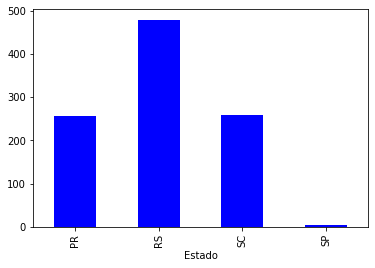

In [ ]:
group.plot.bar(color='blue')

# Normalizando os dados de salário com Desvio Padrão e Mediana

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salario'>

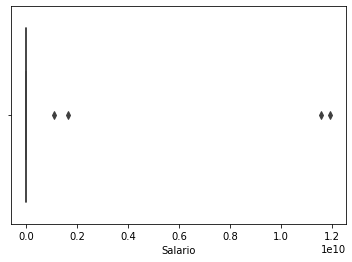

In [ ]:
# Identificou-se uma discrepância em salário
srn.boxplot(data['Salario'])

In [ ]:
# Para normalizar os salários nulos, optou-se por utilizar a mediana pois a mesma não será 
# influenciada por salários altos ou baixos

median = sts.median(data['Salario'])

median 

8637195.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salario'>

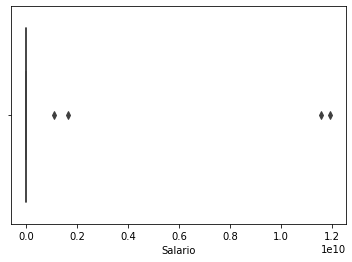

In [ ]:
data['Salario'].fillna(median,inplace=True)

srn.boxplot(data['Salario'])

In [ ]:
# para normalizar os salários optou-se por aplicar a técnica de desvio padrão
desvp = sts.stdev(data['Salario'])

desvp

528988918.4679201

In [ ]:
# multiplicou-se o salário pelo desvio padrão
data.loc[data['Salario']>=2*desvp]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
# obteve-se novamente a mediana
median=sts.median(data['Salario'])
median

8637195.5

In [ ]:
# substituindo a mediana
data.loc[data['Salario']>=2*desvp,'Salario']=median
data.loc[data['Salario']>=2*desvp]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salario'>

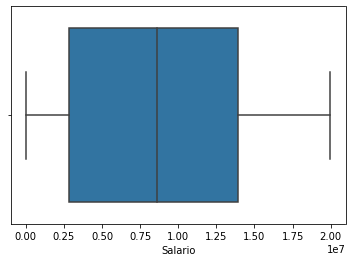

In [ ]:
srn.boxplot(data['Salario'])

# Normaliza os dados referentes a idade usando Mediana

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Idade', ylabel='Density'>

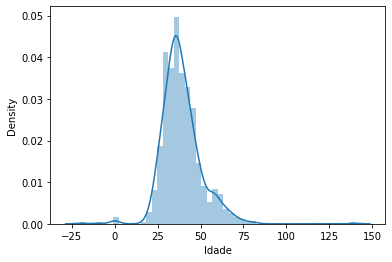

In [ ]:
# Observou-se uma inconcistência nos dados de idade
# como idades de -20 e 140 anos
srn.distplot(data['Idade'])

In [ ]:
# para tratar esses dadas optou-se por aplicar a mediana
median = sts.median(data['Idade'])

median

37

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Idade'>

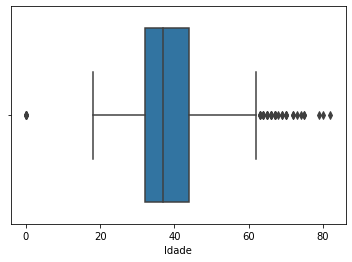

In [ ]:
# atribuindo o resuldo da mediana nos dados discrepantes de idade
data.loc[(data['Idade']<0) | (data['Idade']>120),'Idade']=median

srn.distplot(data['Idade'])
# srn.boxplot(data['Idade'])


# Removendo linhas duplicadas da base de dados

In [ ]:
# Verificou-se a existência de uma linha duplicada
data[data.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
# como soulução manteve-se a primeira linha e fez-se a remoção do restante de 
# linhas duplicadas
data.drop_duplicates(subset='Id',keep='first',inplace=True)

# no final é possível verificar que a base de dados não apresenta mais linhas duplicadas
data[data.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
